In [14]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [15]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01"

In [16]:
data = requests.get(url).text

In [17]:
soup = BeautifulSoup(data,"html.parser")

In [18]:
table = soup.find_all('table') # in html table is represented by the tag <table>

In [19]:
gamestop_av_rev = pd.DataFrame(columns=["Date","GameStop Annual Revenue (Millions of USD)"])
gamestop_qt_rev = pd.DataFrame(columns=["Date","GameStop Quarterly Revenue (Millions of USD)"])

In [20]:
for row in table[0].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        ann_rev = col[1].text
        gamestop_av_rev = gamestop_av_rev.append({"Date":date,"GameStop Annual Revenue (Millions of USD)":ann_rev},ignore_index=True)


In [21]:
for row in table[1].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        qtr_rev = col[1].text
        gamestop_qt_rev = gamestop_qt_rev.append({"Date":date,"GameStop Quarterly Revenue (Millions of USD)":qtr_rev},ignore_index=True)


In [28]:
gamestop_av_rev["GameStop Annual Revenue (Millions of USD)"] = gamestop_av_rev["GameStop Annual Revenue (Millions of USD)"].str.replace("[$,\,]", "", regex=True)

In [30]:
gamestop_qt_rev["GameStop Quarterly Revenue (Millions of USD)"] = gamestop_qt_rev["GameStop Quarterly Revenue (Millions of USD)"].str.replace("[$,\,]", "", regex=True)

In [33]:
gamestop_av_rev["GameStop Annual Revenue (Millions of USD)"] = gamestop_av_rev["GameStop Annual Revenue (Millions of USD)"].astype(int) 

In [34]:
gamestop_qt_rev["GameStop Quarterly Revenue (Millions of USD)"] = gamestop_qt_rev["GameStop Quarterly Revenue (Millions of USD)"].astype(int) 

In [35]:
gamestop_qt_rev["Date"] = gamestop_qt_rev["Date"].astype('datetime64[ns]')

In [36]:
gamestop_av_rev = gamestop_av_rev.sort_values(by=['GameStop Annual Revenue (Millions of USD)'])

In [37]:
gamestop_qt_rev = gamestop_qt_rev.sort_values(by=['Date'],ascending=False)

<AxesSubplot:title={'center':'GameStop Annual Revenue'}, xlabel='Year'>

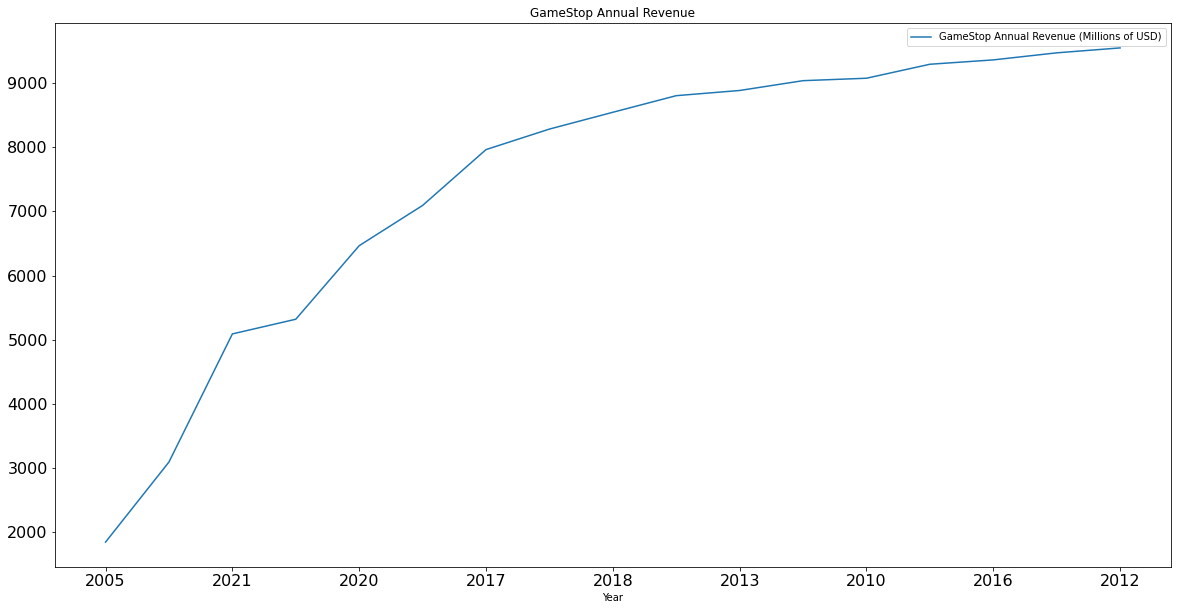

In [38]:
gamestop_av_rev.plot(x="Date",y="GameStop Annual Revenue (Millions of USD)",legend=True,title="GameStop Annual Revenue",xlabel="Year",figsize=(20,10),fontsize=16)

<AxesSubplot:title={'center':'GameStop Quarterly Revenue'}, xlabel='Year'>

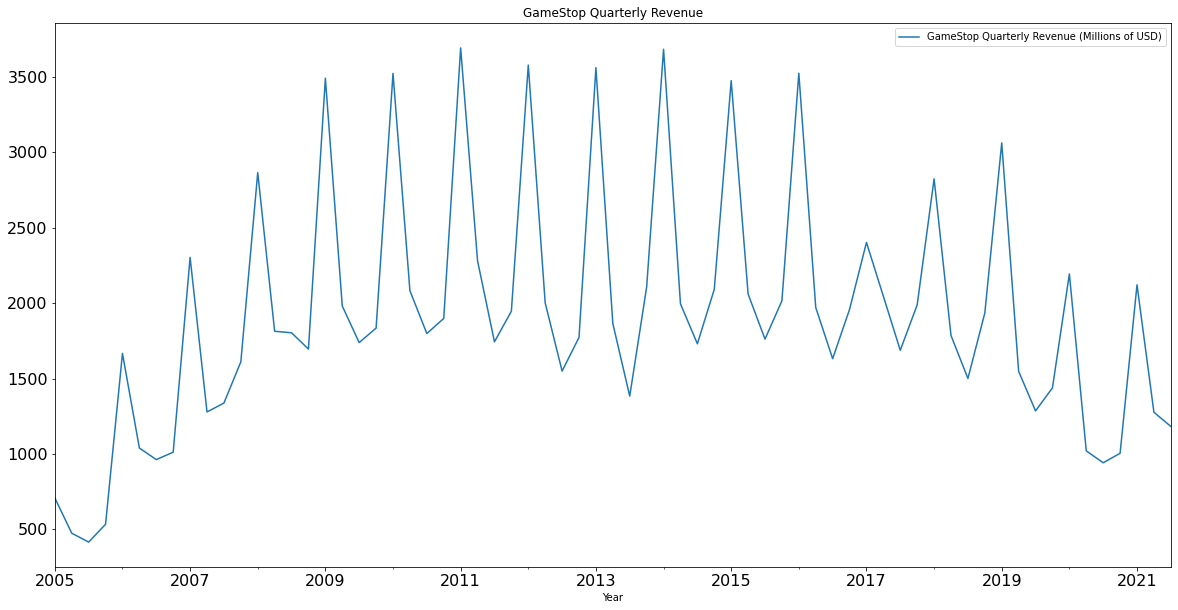

In [39]:
gamestop_qt_rev.plot(x="Date",y="GameStop Quarterly Revenue (Millions of USD)",legend=True,title="GameStop Quarterly Revenue",xlabel="Year",figsize=(20,10),fontsize=16)

In [31]:
gamestop_qt_rev.head()

,Date,GameStop Quarterly Revenue (Millions of USD)
0,2021-07-31,1183
1,2021-04-30,1277
2,2021-01-31,2122
3,2020-10-31,1005
4,2020-07-31,942


In [40]:
def make_graph(x,y,title,xlab,ylab):
    plt.figure(figsize=(9, 6))
    plt.plot(x,y)
    plt.title(title,fontsize=16)
    plt.xlabel(xlab,fontsize=16)
    plt.ylabel(ylab,fontsize=16)

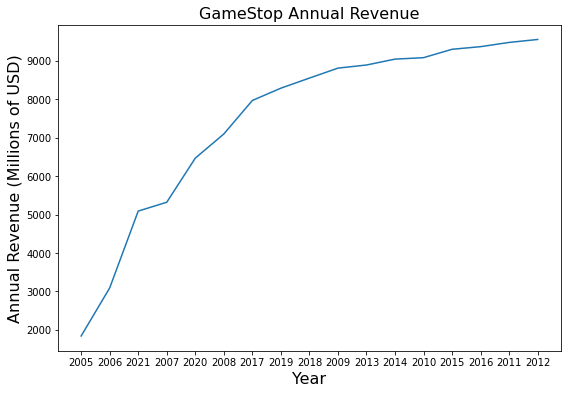

In [41]:
make_graph(gamestop_av_rev["Date"],gamestop_av_rev["GameStop Annual Revenue (Millions of USD)"],
           "GameStop Annual Revenue","Year","Annual Revenue (Millions of USD)")

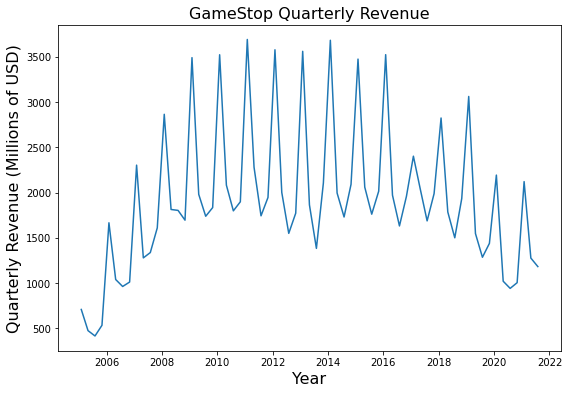

In [42]:
make_graph(gamestop_qt_rev["Date"],gamestop_qt_rev["GameStop Quarterly Revenue (Millions of USD)"],
           "GameStop Quarterly Revenue","Year","Quarterly Revenue (Millions of USD)")